Name: Bernardo Neres Silva  
Student Number: 2023484  
Github link: https://github.com/neresbernardo/Bernardo-Neres_ML_CA1.ipynb 

EDA

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("log2.csv")

# Display the first few rows of the dataframe
print(df.head())


   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

   Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  pkts_sent  \
0    177          94              83        2                  30          1   
1   4768        1600            3168       19                  17         10   
2    238         118             120        2                1199          1   
3   3327        1438            1889       15                  17          8   
4  25358        6778           18580       31                  16         13   

   pkts_received Action  
0              1  allow  
1              9

In [5]:
# Check the summary statistics
print(df.describe())


        Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
count  65532.000000      65532.000000     65532.000000          65532.000000   
mean   49391.969343      10577.385812     19282.972761           2671.049930   
std    15255.712537      18466.027039     21970.689669           9739.162278   
min        0.000000          0.000000         0.000000              0.000000   
25%    49183.000000         80.000000         0.000000              0.000000   
50%    53776.500000        445.000000      8820.500000             53.000000   
75%    58638.000000      15000.000000     38366.250000            443.000000   
max    65534.000000      65535.000000     65535.000000          65535.000000   

              Bytes    Bytes Sent  Bytes Received       Packets  \
count  6.553200e+04  6.553200e+04    6.553200e+04  6.553200e+04   
mean   9.712395e+04  2.238580e+04    7.473815e+04  1.028660e+02   
std    5.618439e+06  3.828139e+06    2.463208e+06  5.133002e+03   
min    6.00

In [5]:
# Check for missing values
print(df.isnull().sum())


Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64


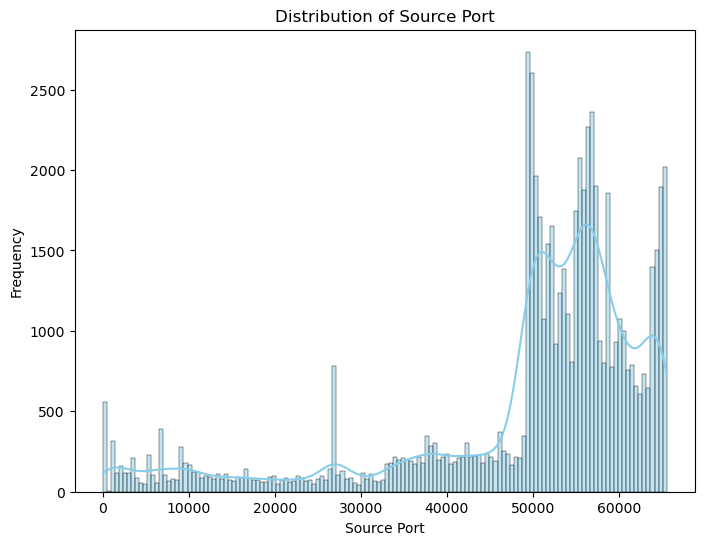

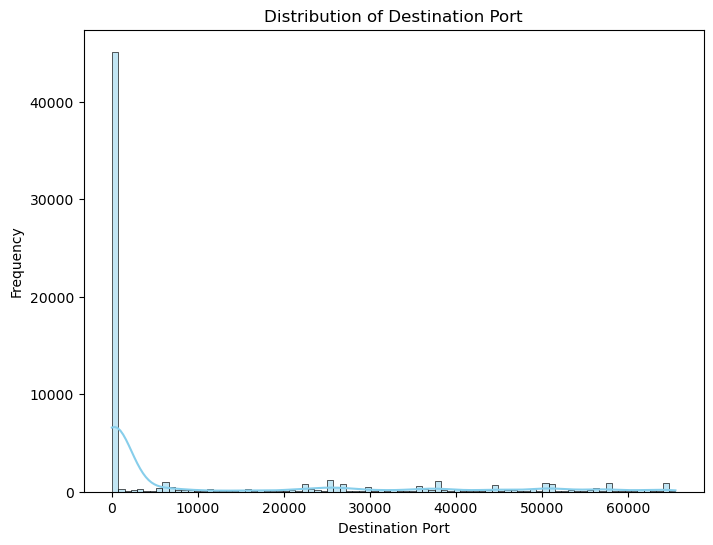

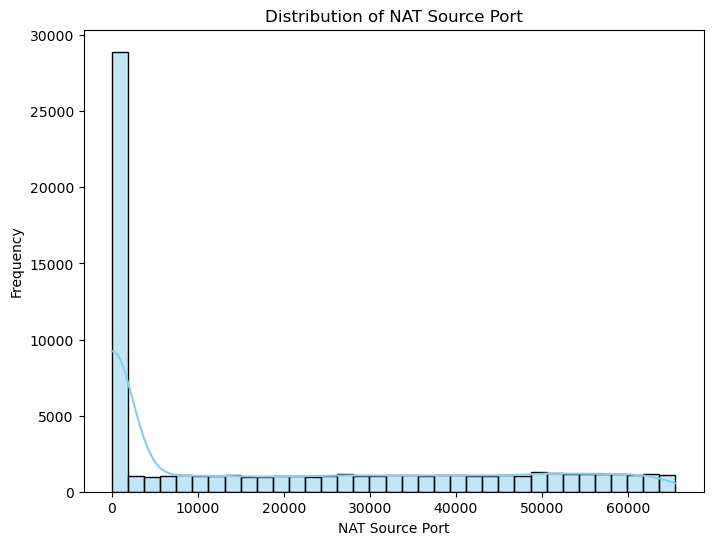

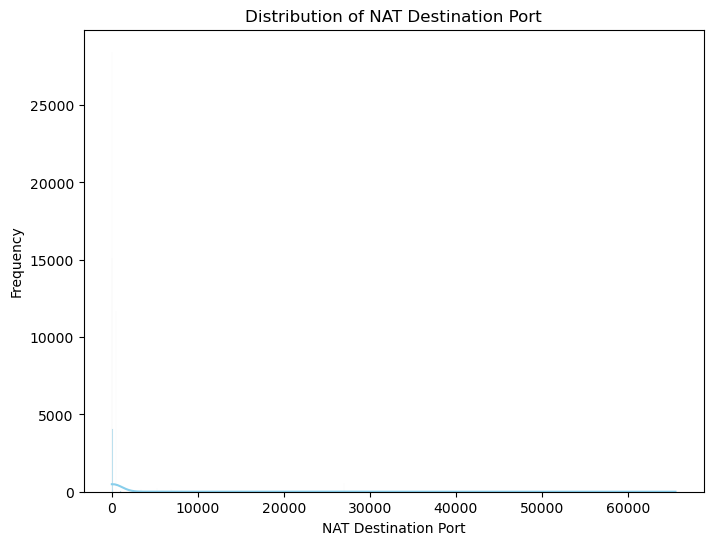

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of numerical variables using histograms and categorical variables using count plots
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include='object').columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Visualize relationships between numerical variables using a pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()


In [ ]:
# Visualize relationships between numerical and categorical variables using box plots
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Action', y=column, data=df, palette='pastel')
    plt.title(f'Box Plot of {column} by Action')
    plt.xlabel('Action')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.show()


After examining the dataset, we discovered that it includes details on more than 65K firewall access attempts, divided into four categories: "allow," "deny," "drop," and "reset-both."

We are able to understand the different types of traffic provides with the firewall by examining the distribution of these categories. This distribution help in selecting the most appropriate categorization strategy for incoming traffic prediction.

Also, we studied the dataset's numerical properties and observed different patterns in their distributions. This implies that some characteristics might be more important for determining how traffic exchanges would turn out.

Because there are no missing values, handling any missing data is eliminated from our analysis, making it simpler.

We want to employ classic classification algorithms like logistic regression, decision trees, and random forests in light of these findings. The dataset's balanced distribution of categories should make these methods function nicely.


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

try:
    # Load the dataset
    df = pd.read_csv("log2.csv")
    
    # Encode categorical variable 'Action' using LabelEncoder
    label_encoder = LabelEncoder()
    df['Action'] = label_encoder.fit_transform(df['Action'])
    
    # Split the data into features (X) and target variable (y)
    X = df.drop(columns=['Action'])  # Features
    y = df['Action']  # Target variable
    
    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Print the shapes of the training and testing sets
    print("Training set shape:", X_train.shape, y_train.shape)
    print("Testing set shape:", X_test.shape, y_test.shape)

except FileNotFoundError:
    print("Error: File 'log2.csv' not found. Please make sure the file path is correct.")
except Exception as e:
    print("An error occurred:", e)


Training set shape: (52425, 11) (52425,)
Testing set shape: (13107, 11) (13107,)


Data Preparation Steps:

Remove Irrelevant Columns: We remove any columns that are not necessary for the modelling or analytic process. This increases processing performance and lowers noise in the dataset.

Handle Missing Values: The mean of the corresponding columns is used to fill in any missing values in the dataset. This keeps important information from being lost and guarantees that all data points are used in the study.

Standardise Numerical Features: StandardScaler is used to standardise numerical features. Standardisation guarantees that the mean of numerical characteristics is 0 and the standard deviation is 1, which is crucial for the best possible performance of some machine learning methods.

Divide Data into Training and Testing Sets: We used train test split to divide the dataset into training and testing sets. This helps determine how well the model generalises to new, unseen data by enabling us to train it on one piece of data and measure its performance on another.

In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("log2.csv")


In [25]:
# Drop irrelevant columns if they exist
irrelevant_columns = ['irrelevant_column1', 'irrelevant_column2']
existing_columns = [col for col in irrelevant_columns if col in df.columns]

if existing_columns:
    df.drop(columns=existing_columns, inplace=True)
    print("Irrelevant columns dropped successfully.")
else:
    print("No irrelevant columns found in the dataset.")

# Handle missing values (if any)
columns_with_missing_values = df.select_dtypes(include='number').columns
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(df[columns_with_missing_values].mean())


# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Action'])  # Features
y = df['Action']  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



No irrelevant columns found in the dataset.


In [26]:
# Initialize logistic regression model with modified parameters
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train Logistic Regression model
logistic_regression.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [27]:
# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracy score
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.9858091096360724


References 

GeeksforGeeks.(Dec 06,2023). EDA | Exploratory Data Analysis in Python. Available at https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

Analytics Vidhya. (Jan 10,2024). Step-by-Step Exploratory Data Analysis (EDA) using Python. Available at https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

TechTarget. (n.d.). What is data preparation? An in-depth guide to data prep. Available at https://www.techtarget.com/searchbusinessanalytics/definition/data-preparation

Scikit-learn developers. (n.d.). sklearn.model_selection.train_test_split. Available at  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html